# Regresion Logistica

Este tipo de tecnicas funciona bien cuando, la variable dependiente, es decir, la columna objetivo contiene valores discretos. <br>

Este tipo de problemas se conocen como _**problemas de clasificacion**_. En la clasificacion, la columna objetivo tiene un conjunto <br>
limitado de valores posibles que representan diferentes categorias. Para seguir utilizando funciones matematicas, se utiliazan numeros <br>
enteros para representar las diferentes categorias.


Por ahora nos centraremos en la _**clasificacion binaria**_, donde solo existen dos valores:
- **0 corresponde a la condicion de Falso**.
- **1 corresponde a la condicion de Verdadero**.

### Estimacion de Probabilidades.

Al igual que la _Regresion Lineal_, un modelo de _**Regresion Logistica**_ calcula una suma ponderada de las caracteristicas de entrada ( mas el termino _bais_ ), pero la salida es la _logistica_ del resultado: $$ \widehat{p} = h_{\mathbf{\theta}}(\mathbf{x}) = \sigma(\mathbf{x}^{T}\cdot\mathbf{\theta}) $$

La logistica &mdash; anotada como: $ \sigma(\cdot) $ &mdash; es la _**Funcion sigmoid**_, la cual regresa un numero entre 0 y 1, y se define de la siguiente manera: $$ \sigma(t) = \frac{1}{1 + e^{-t}} $$

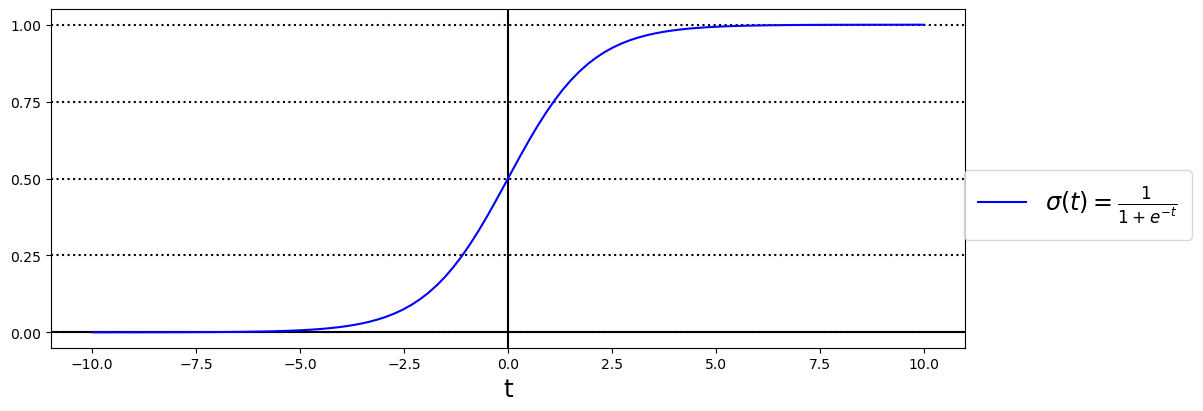

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 100)
log_fun = 1 / (1 + np.exp(-t))


fig, axs = plt.subplots(layout='constrained', figsize=(12,4))
plt.yticks([ n * 0.25 for n in range(0,5)] )
plt.grid(True,
        axis = 'y',
        zorder = 0,
        linestyle = ':',
        linewidth = 1.5,
        color = 'k')
axs.axvline(0, color='black',)
axs.axhline(0, color='black',)
axs.plot(t, log_fun, 'b-', label=r'$ \sigma(t) = \frac{1}{1 + e^{-t}} $')
fig.legend(loc='outside right', ncols=1, fontsize='xx-large', borderpad=0.6,)
axs.set_xlabel('t', fontsize=18)
plt.show()

 Tomando en cuenta la que $ \mathbf{x}\cdot\mathbf{\theta} $ es igual a &nbsp; $ \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} + ... + \theta_{n}x_{n} $ podemos reescribir la ecuacion de la _Regresion lineal_ como: $$ \widehat{p} = h_{\mathbf{\theta}}(\mathbf{x}) = \sigma(\mathbf{x}^{T }\cdot\mathbf{\theta}) = \frac{1}{1 + e^{-(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} + ... + \theta_{n}x_{n})}} = \frac{1}{1 + e^{-\left(\theta_{0} + \sum\limits_{n=1}^{N}\theta_{n}x_{n} \right)}} $$

Una vez que el modelo de _**Regresion Logistica**_ ha estimado la probabilidad $ \widehat{p} = h_{\mathbf{\theta}}(\mathbf{x}) $ de que una instancia de $ \mathbf{x} $ pertenezca a la clase positiva, la prediccion $ \widehat{y} $ puede hacerse facilmente: $$ \widehat{y} = \begin{cases} 0 \quad \mathsf{si} \quad \widehat{p} < 0.5\\ 1 \quad \mathsf{si} \quad \widehat{p} \ge 0.5 \end{cases} $$ 

Como se puede ver, $ \;\; \sigma(t) < 0.5 \;$ cuando $ \; t < 0 \; $ y $ \; \sigma(t) \ge 0.5 \;$ cuando $ \; t \ge 0 \; $, por lo que un modelo _Regresion Logistica_ predice $ \; 1 \; \mathsf{si} \; \mathbf{x}^{T}\cdot\mathbf{\theta} \;$ es positivo, y $ \; 0 \; $ si es negativo.

In [4]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

### Entrenamiento

El objetivo del entrenamiento es encontrar el vector $ \; \mathbf{\theta} \; $, tal que maximise el el rendimiento del modelo. Existen dos formas comunes de alcanzar esta optimizacion:
1. A traves de la llamada **Loss minimizing** con el uso del _gradient descent_.
2. La otra es usando lo que se conoce como **Maximum Likelihood Estimation**. 

#### 1. Loss minimizing

Los _pesos_ (representados por $ \theta $) es una parte vital para la _Regresion Logistica_ y otros algoritmos de ML y el proposito, siempre es encontrar los mejores valores para ellos. <br>

Para encontrarlos, al inicio se toman valores aleatorios y se mide el desempeño del algoritmo usando esos valores. Para ello se utiliza la **funcion de perdida (_loss function_)**:  $$ h = sigmoid(X \cdot \theta) = \sigma(X \cdot \theta) $$ $$ loss(\theta) = J(\theta) = \frac{1}{m} \cdot [-y^{T}log(h)-(1-y)^{T}log(1-h)] $$

Donde: 
- $ m \;$ es el numero de muestras.
- $ y \;$ es la clase o atributo objetivo.

In [5]:
def loss(h, y):
    return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()

El objetivo siempre es como ya mencionamos, es encontrar los mejores valores, es decir **minimizar las perdidas**, lo cual se logra incrementando o disminuyendo los _pesos_ ($ \theta $), esto es comunmente conocido como _**fitting**_. Pero ¿cuales pesos deberian ser mas grandes y cuales mas pequeños? Pues con ayuda de la funcion llamada **Gradiente descendente (_Gradient descent_)**. El cual es la derivada de la funcion de perdida _loss function_ con respecto a los _pesos_ ($ \partial{\theta} $): $$ gd(\theta) =  \frac{\partial{J(\theta)}}{\partial{\theta}} = \frac{1}{m} \cdot X^{T}(\sigma(X\theta)-y) $$

Y ahora con esto, actualizamos los _pesos_ ($ \theta $): $$ \theta := \theta - \alpha \cdot \frac{\partial{J(\theta)}}{\partial{\theta}} $$

Donde: 
- $ \alpha \;$ es la taza de aprendizaje (usualmente $ 0.1 $).

In [6]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

#### 2. Maximum Likelihood estimation.

Aqui el objetivo es _**maximizar la probabilidad**_, lo cual podemos conseguir con el _"Gradiente ascendente"_. El cual es el mismo que el _Gradiente descendente_, excepto que el objetivo aqui es **maximizar** la funcion en lugar de minizarlo: $$ LL = y \cdot z - log(1 + e^{z}) $$ 

Donde:
- $ z \;$ es $ \quad \mathbf{x}^T \cdot \theta $.

In [7]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y * z - np.log(1 + np.exp(z)) )
    return ll

Ahora, el gradiente de $\; LL \;$ es la derivada de esa funcion: $$ \nabla{LL} = X^{T} \cdot (y - \sigma(X \cdot \theta)) $$ 

Y entonces actualizamos los _pesos_ ($ \theta $), pero ahora adicionando la multiplicacion del gradiente por la taza de aprendizaje: $$ \theta := \theta + \alpha \cdot \frac{\partial{LL}}{\partial{\theta}} $$

In [8]:
def gradient_ascent(X, h, y ):
    return np.dot(X.T, (y-h))

def update_weight_mle(weight, learning_rate, gradient):
    return weight + (learning_rate * gradient)

#### Conclusion

1. Se aprendio que la **Regresion Logistica** es un algoritmo de _**Clasificacion**_, ya que la salida es un numero entre 0 y 1.
2. Se comprendio dos maneras comunes de _optimizar_ la Regresion Logistica, **minimizando la perdida** y **maximizando la probabilidad**.
3. Se vio la _diferencia_ entre **Gradiente descendente** y **Gradiente ascendente**.